In [516]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

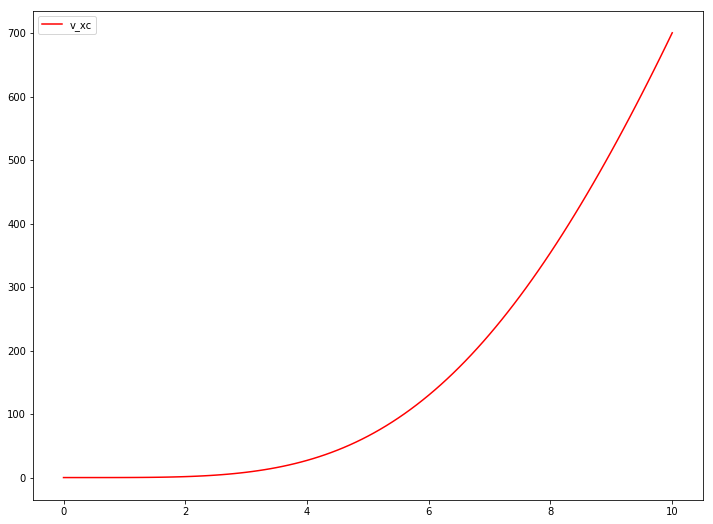

In [517]:
# x'=Fx*x+Gx*wx+B*c
# c'=Fc*c+Gc*wc
# [[x'],[c']]=[[Fx,B],[0,Fc]]*[[x],[c]]+[[Gx,0],[0,Gc]]*[[wx],[wc]]
#T1
# x''=0+c
# c'=-b*c+wc
# => Fx=[[0,1],[0,0]]  Gx=[[0,0],[0,0]]  wx=[[0],[0]]  B=[[0,0],[1,0]]  
#    Fc=-b  Gc=1 wc=w


b=0.7
F=np.matrix([[0,1,0],[0,0,1],[0,0,-b]])
G=np.matrix([[0],[0],[1]])
dt=0.1
N=100

vv=np.zeros((N+1,2))


cov_xc=np.zeros((3,3))
v_xc=np.zeros((N+1,1))
v_xc[0]=cov_xc[0,0]
np.random.seed(0)
w=np.random.normal(0,1,100)
for i in range(N+1):    
    #w=np.random.normal(0,1)
    
    A=np.row_stack((np.column_stack((-F,G*w[i-1]*np.transpose(G))),np.column_stack((np.zeros((3,3)),np.transpose(F)))))*dt
    
    B=linalg.expm(A)
    B22=B[3:6,3:6]
    B12=B[0:3,3:6]
    Phi=np.transpose(B22)
    Q=Phi@B12
    #print(Q)
    cov_xc=Phi@cov_xc@np.transpose(Phi)+Q
    v_xc[i]=cov_xc[0,0]

vv[:,0]=np.transpose(v_xc)
t=np.linspace(0,10,num=(N+1))
plt.figure(1,figsize=(12,9))
plt.plot(t,v_xc,'r-',label='v_xc')

plt.legend()
plt.show()


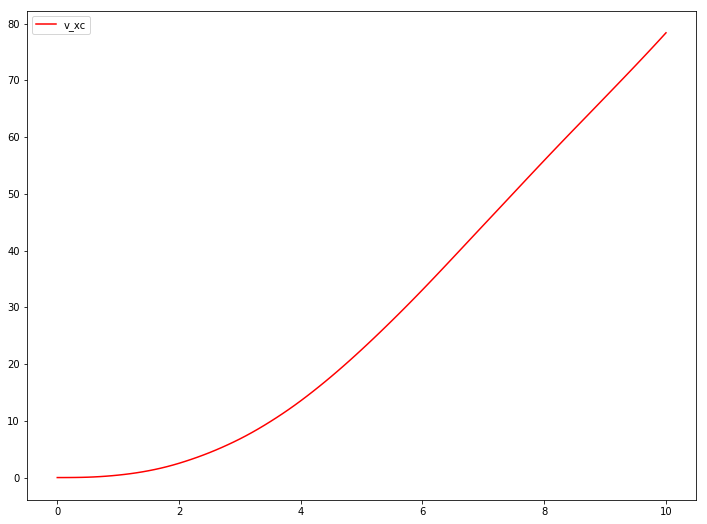

In [518]:
F=np.matrix([[0,1],[0,0]])
G=np.matrix([[0],[1]])
dt=0.1
N=100

cov_xc=np.zeros((2,2))
v_xc=np.zeros((N+1,1))
v_xc[0]=cov_xc[0,0]
#np.random.seed(1)
for i in range(N+1):    
    #w=np.random.normal(1)
    A=np.row_stack((np.column_stack((-F,G*w[i-1]*np.transpose(G))),np.column_stack((np.zeros((2,2)),np.transpose(F)))))*dt
    B=linalg.expm(A)
    B22=B[2:4,2:4]
    B12=B[0:2,2:4]
    Phi=np.transpose(B22)
    Q=Phi@B12   
    cov_xc=Phi@cov_xc@np.transpose(Phi)+Q
    v_xc[i]=cov_xc[0,0]
#print(Phi)
vv[:,1]=np.transpose(v_xc)
t=np.linspace(0,10,num=(N+1))
plt.figure(2,figsize=(12,9))
plt.plot(t,v_xc,'r-',label='v_xc')

plt.legend()
plt.show()


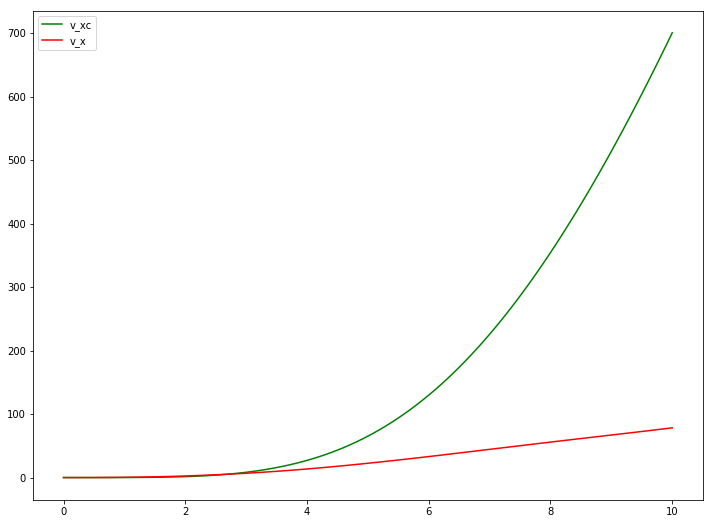

In [519]:
plt.figure(2,figsize=(12,9))
plt.plot(t,vv[:,0],'g-',label='v_xc')
plt.plot(t,vv[:,1],'r-',label='v_x')
plt.legend()
plt.show()
